Notebook for processing the geometric calibration of each channel of OROS, and cross-channel stereo calibration.

# Process

First we will process, for each channel, the intrinsic and extrinsic camera matrices from images of the square 10x10 calibration target oriented at mutiple positions.
We will then draw the epipolar lines on these images, showing, for each channel, the epipolar line of each other channel in turn.

Then, we will experiment with drawing the epipolar lines over the sample-region mounted calibration target, that has been imaged at multiple positions. Again, we will draw epipolar lines for each positions, for each channel with each other channel.

Steps:
1. For each position, load images for each channel.
2. Perform averaging and average dark subtraction
3. For each position, find the calibration target points
4. For all positions, and for each channel, solve for camera matrices
5. For each position, and for each channel, find and draw epipolar lines for each other channel

# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import orochi_sim_proc as osp
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading images

In [3]:
# get the list of positions
# get the list of the cameras
# for each position, for each camera, load the image
# find the calibration points, store in a dictionary indexed by camera
# for each camera, calibrate to get intrinsic and extrinsic matrices


Position 0 of 10
Loaded 25 images (img) for: 0 (850 nm)
Loading Geometric Target for: 0 (850.0 nm)
Loaded 25 images (drk) for: 0 (850 nm)
Subtracting dark frame for: 0 (850 nm)
Loaded 25 images (img) for: 1 (475 nm)
Loading Geometric Target for: 1 (475.0 nm)
Loaded 25 images (drk) for: 1 (475 nm)
Subtracting dark frame for: 1 (475 nm)
Loaded 25 images (img) for: 2 (400 nm)
Loading Geometric Target for: 2 (400.0 nm)
Loaded 25 images (drk) for: 2 (400 nm)
Subtracting dark frame for: 2 (400 nm)
Loaded 25 images (img) for: 3 (550 nm)
Loading Geometric Target for: 3 (550.0 nm)
Loaded 25 images (drk) for: 3 (550 nm)
Subtracting dark frame for: 3 (550 nm)
Loaded 25 images (img) for: 4 (725 nm)
Loading Geometric Target for: 4 (725.0 nm)
Loaded 25 images (drk) for: 4 (725 nm)
Subtracting dark frame for: 4 (725 nm)
Loaded 25 images (img) for: 5 (950 nm)
Loading Geometric Target for: 5 (950.0 nm)
Loaded 25 images (drk) for: 5 (950 nm)
Subtracting dark frame for: 5 (950 nm)
Loaded 25 images (img) 

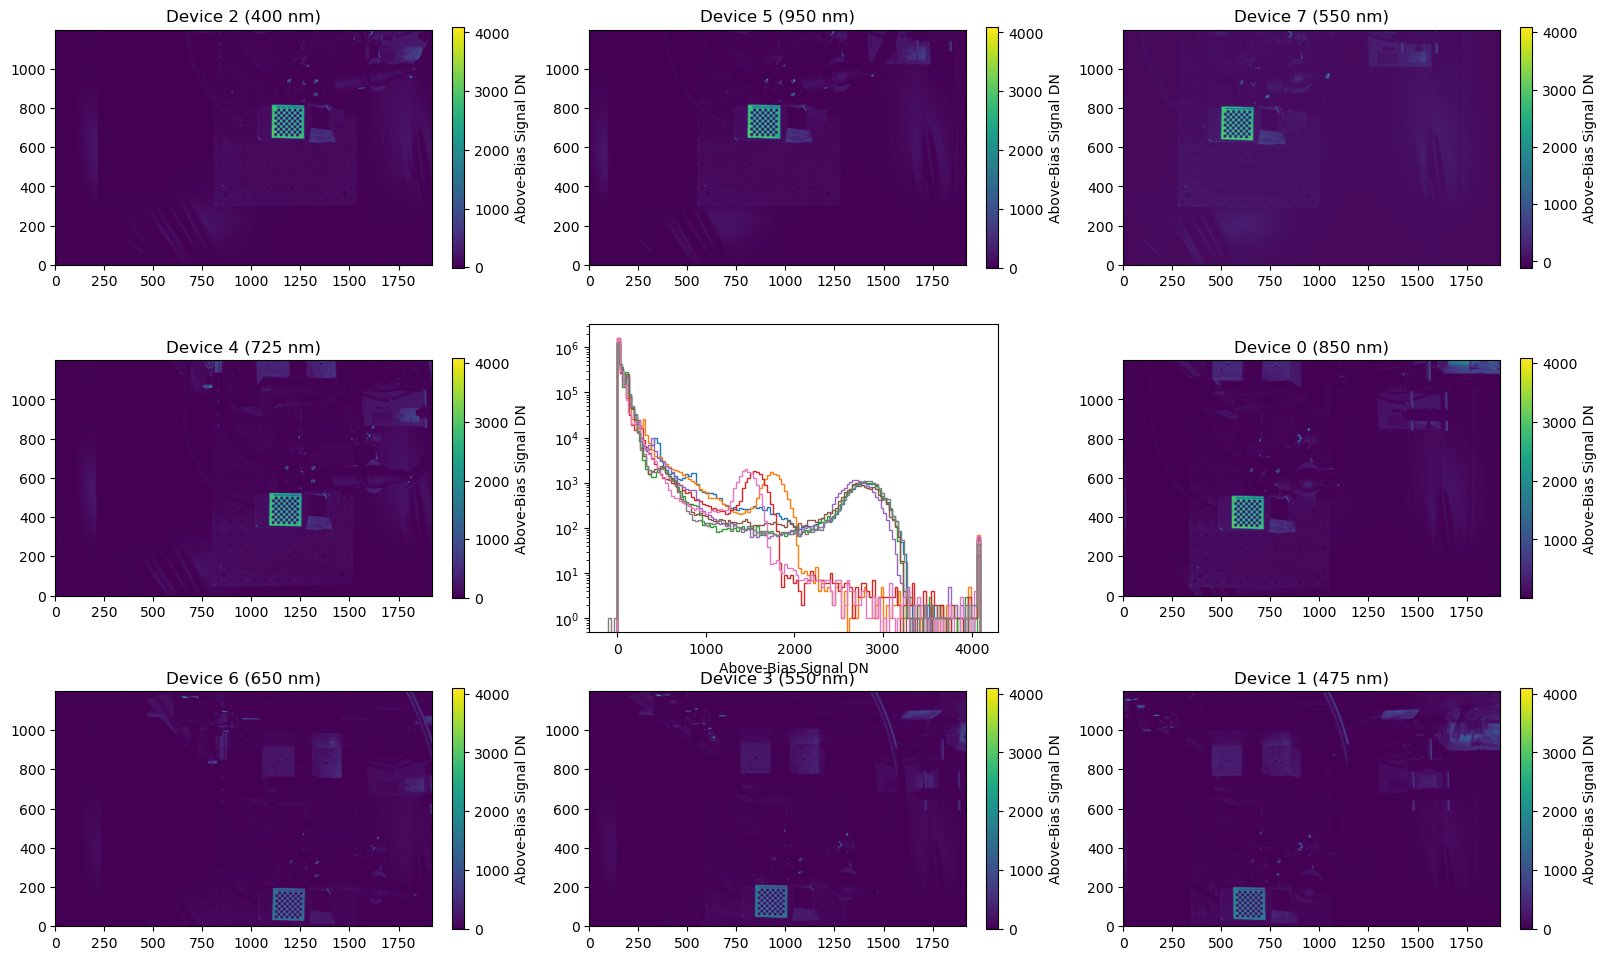

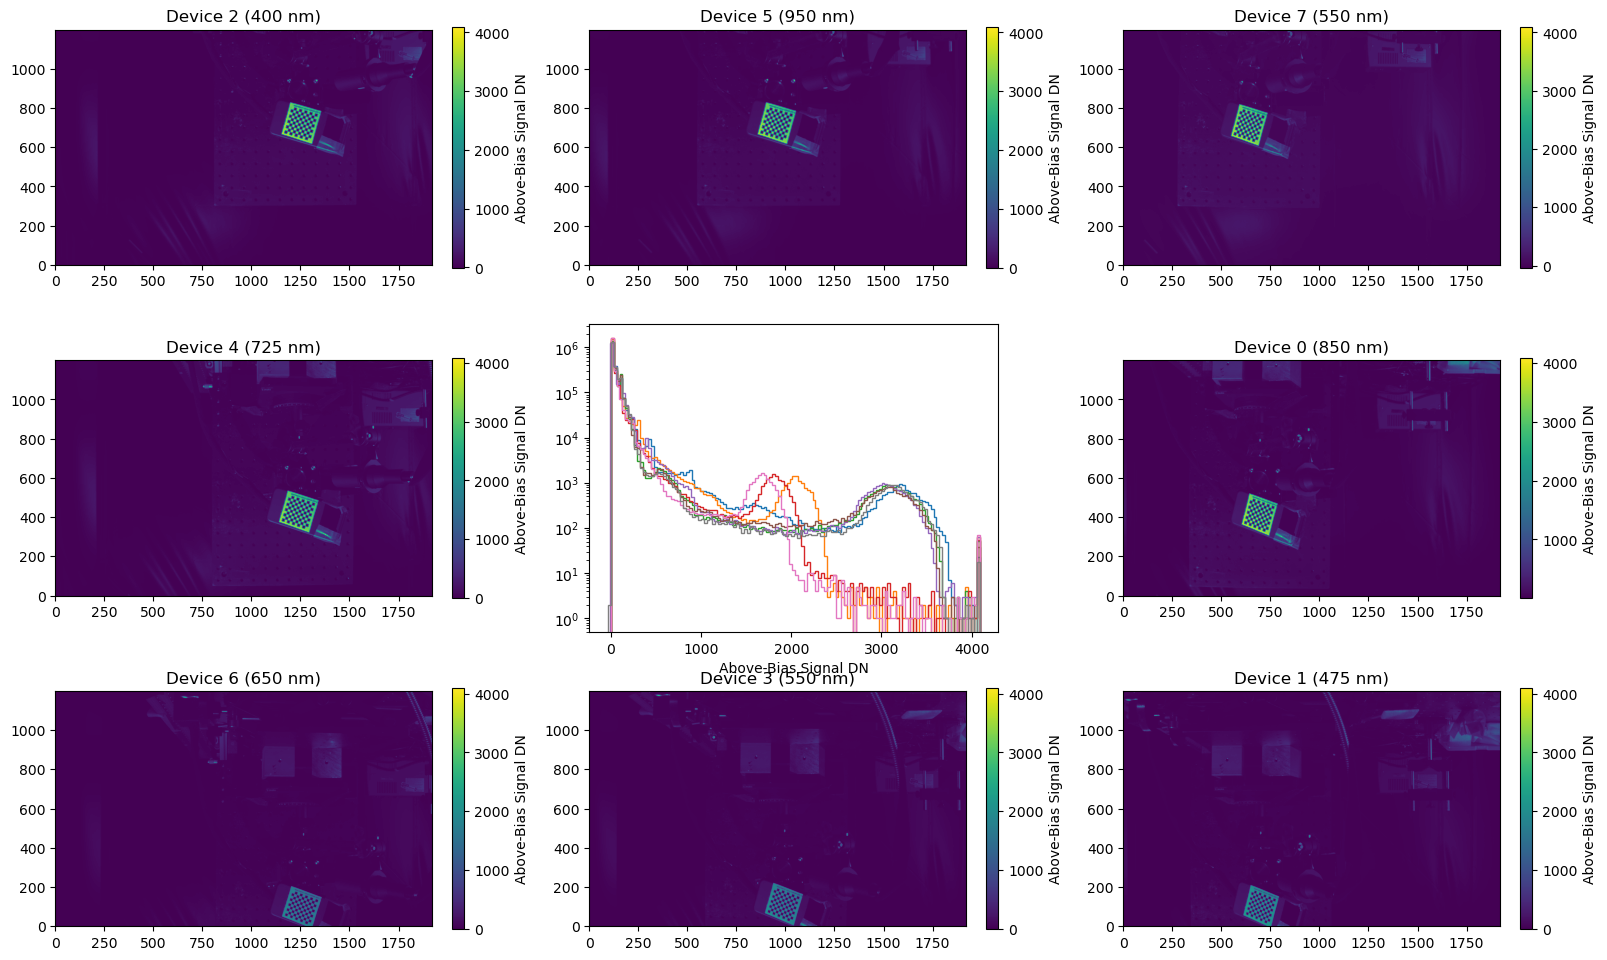

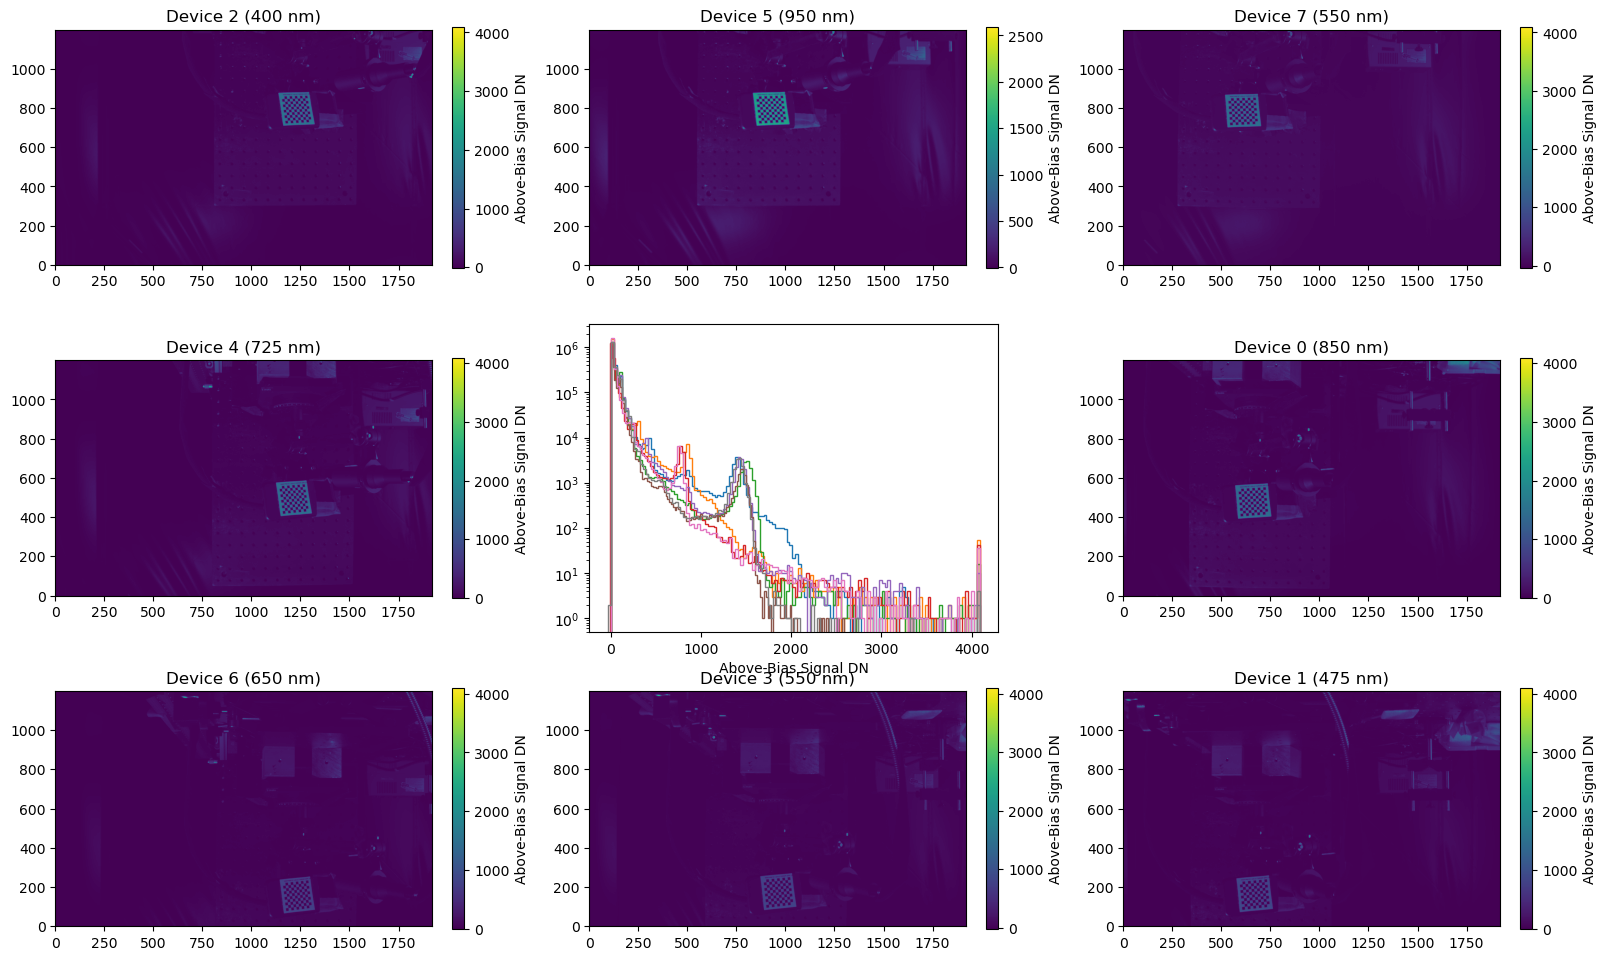

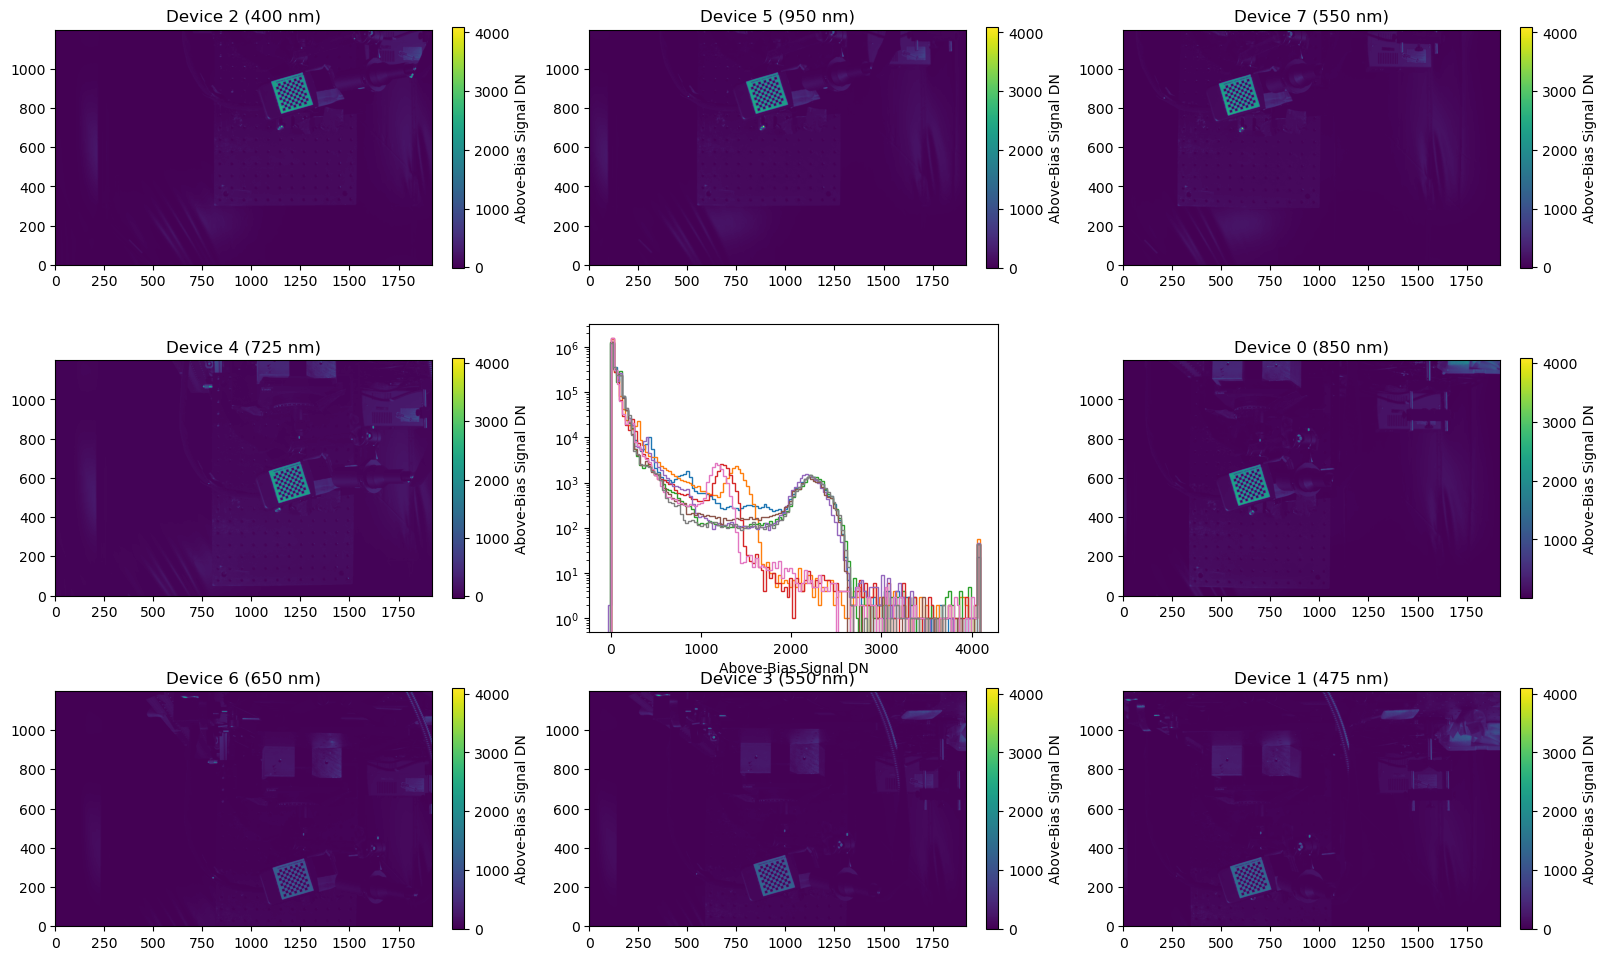

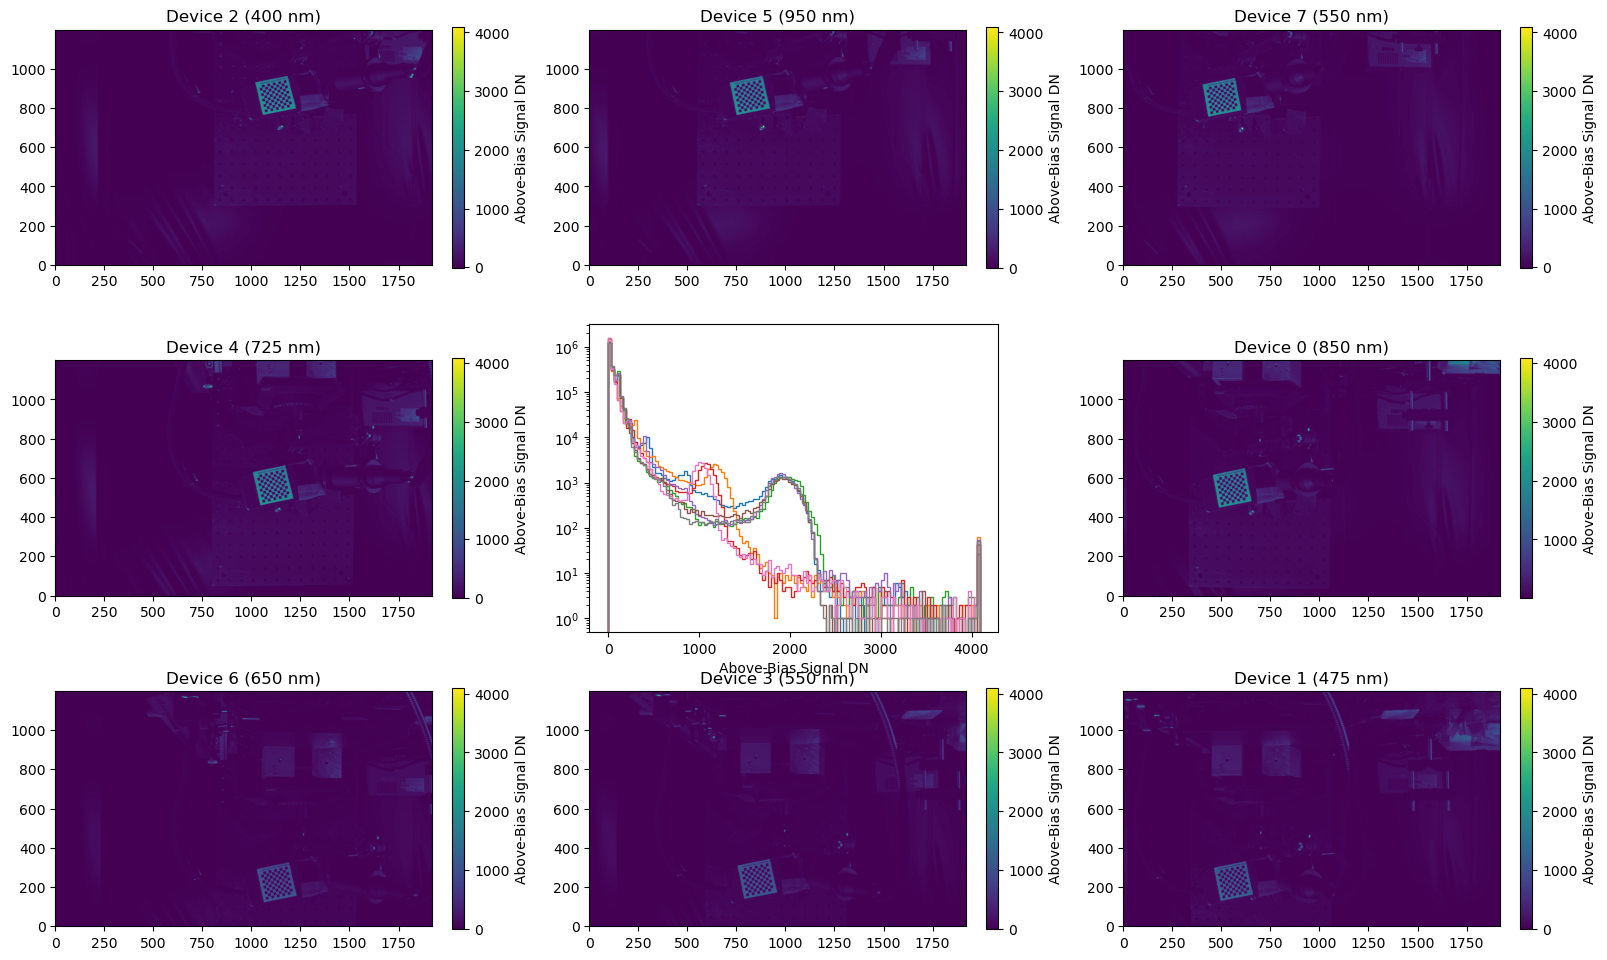

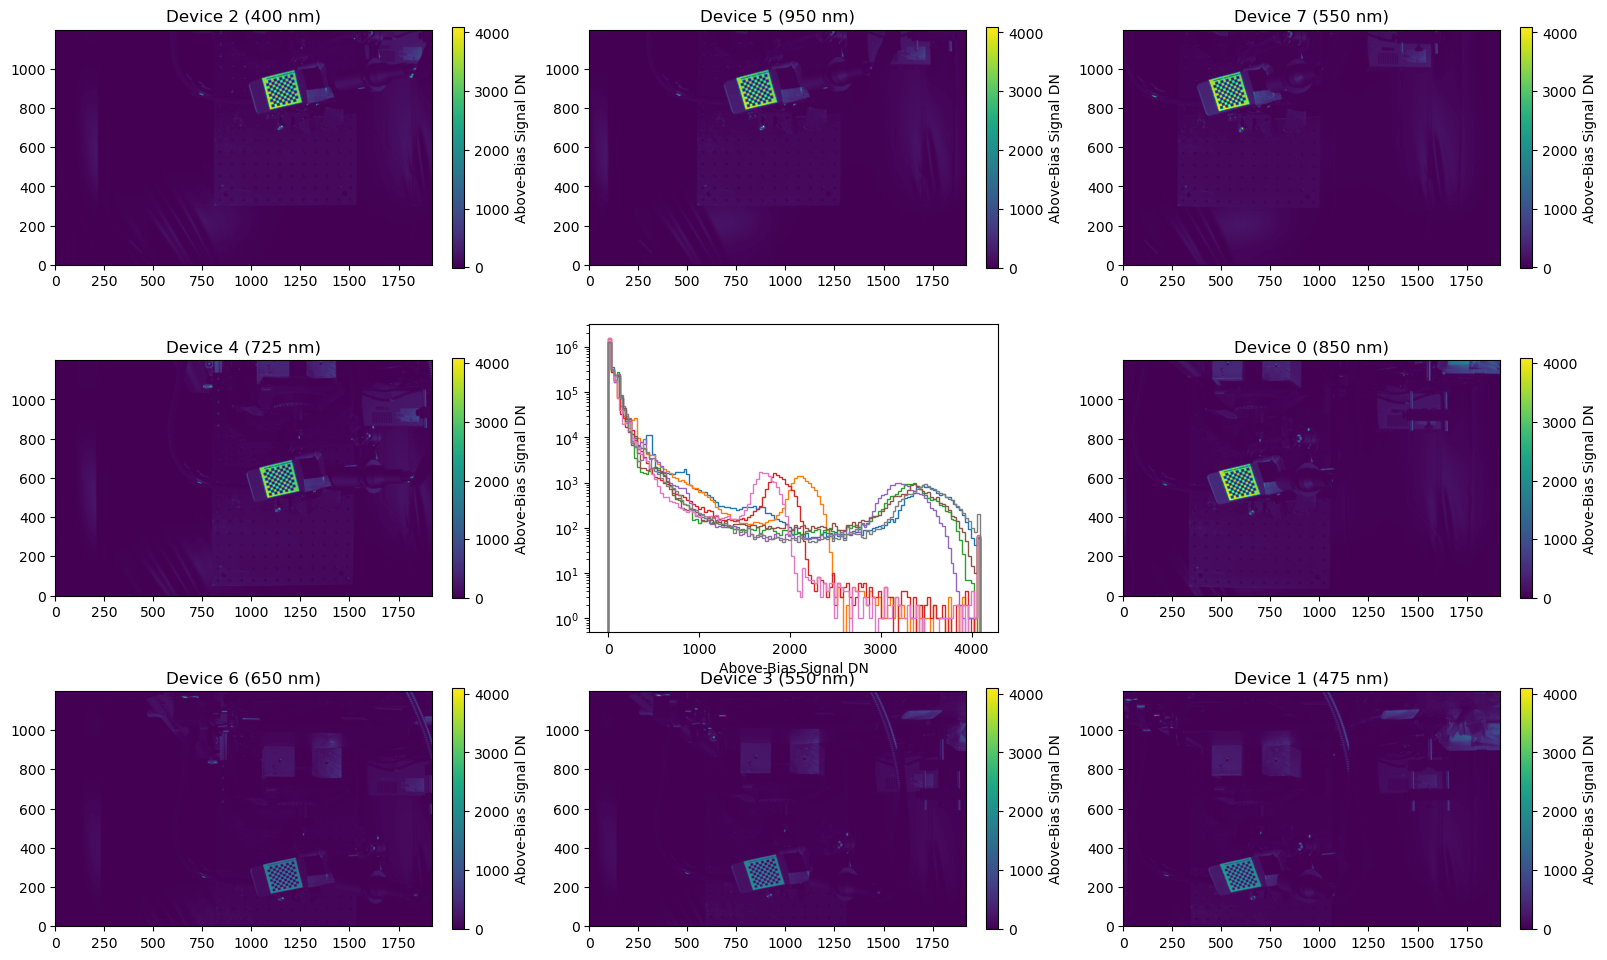

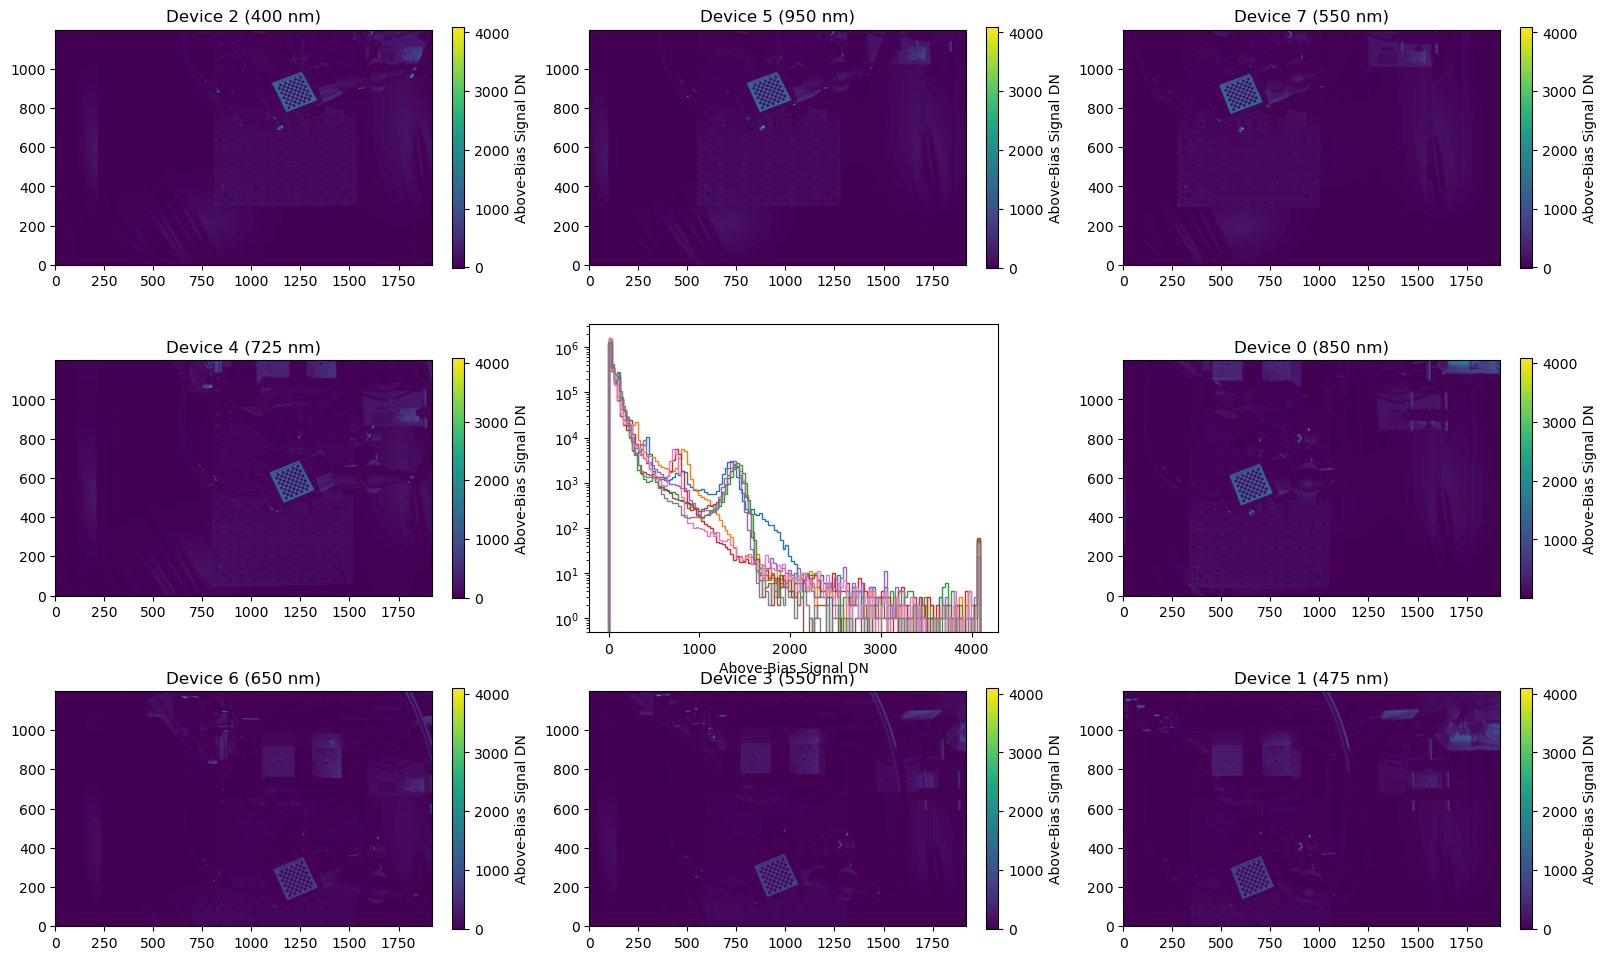

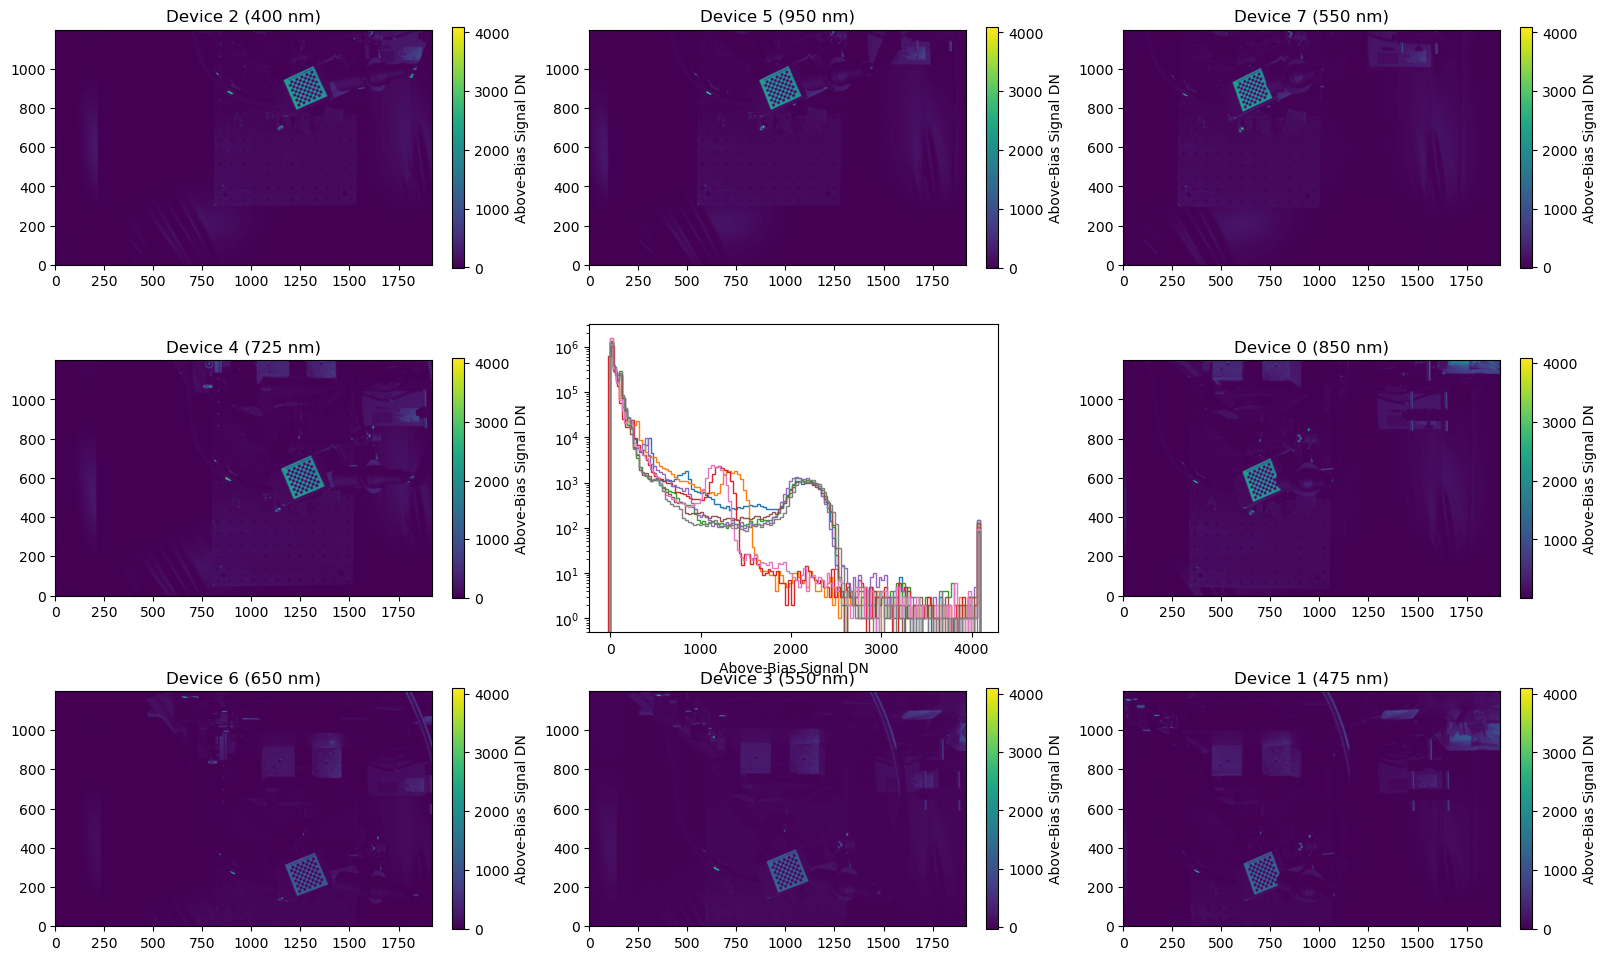

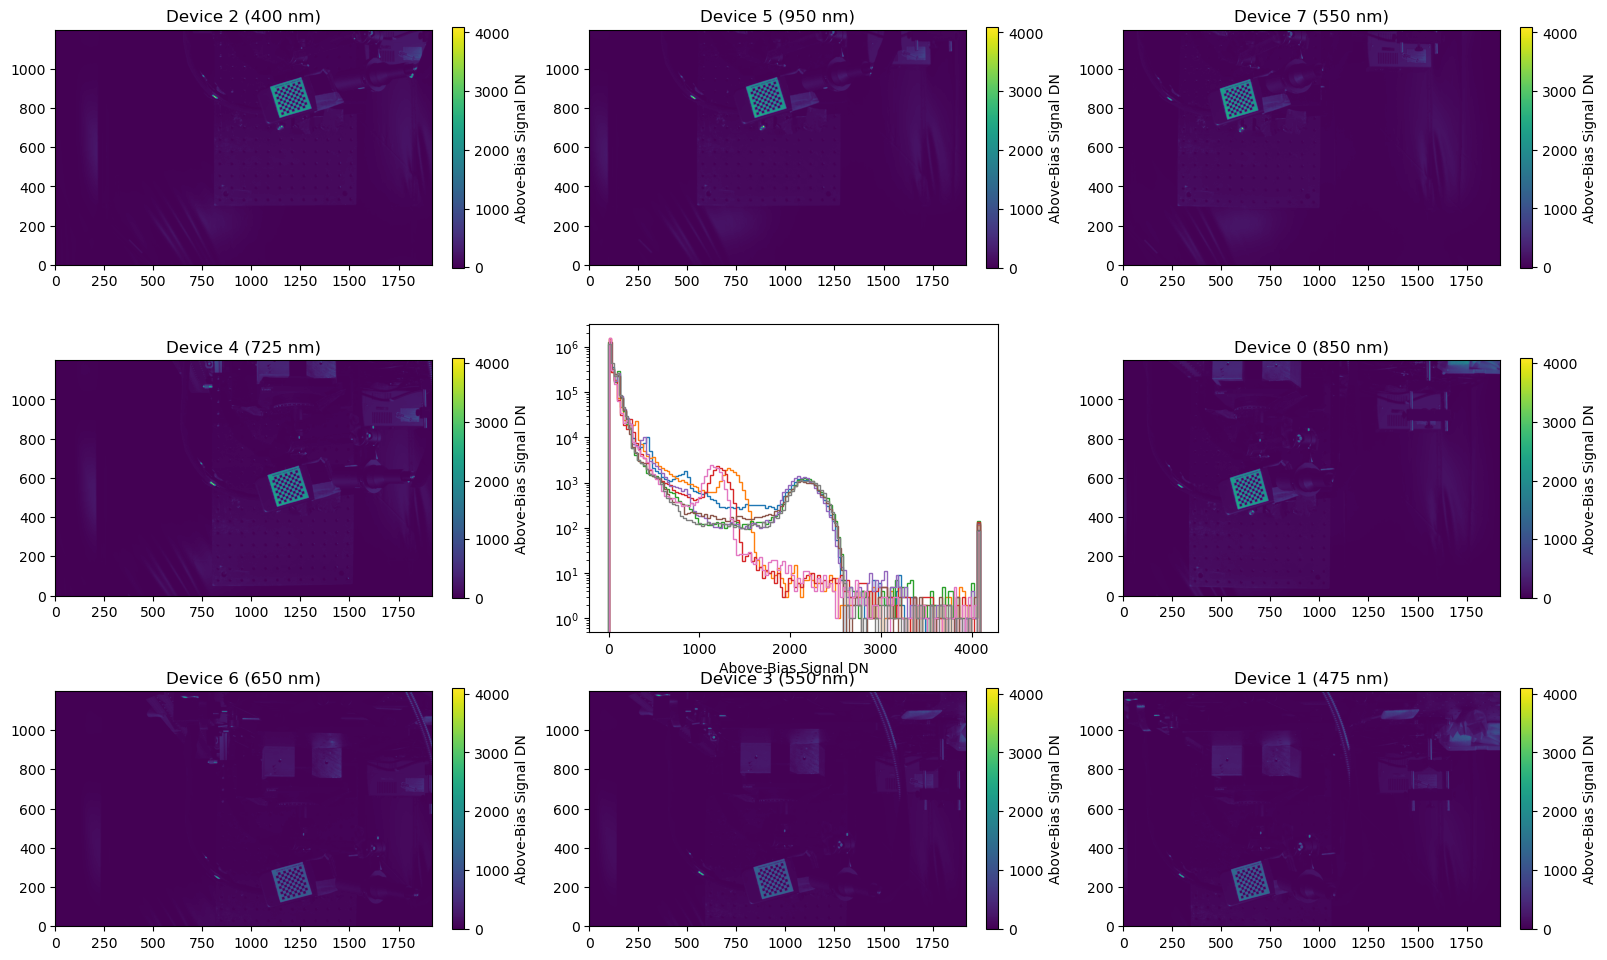

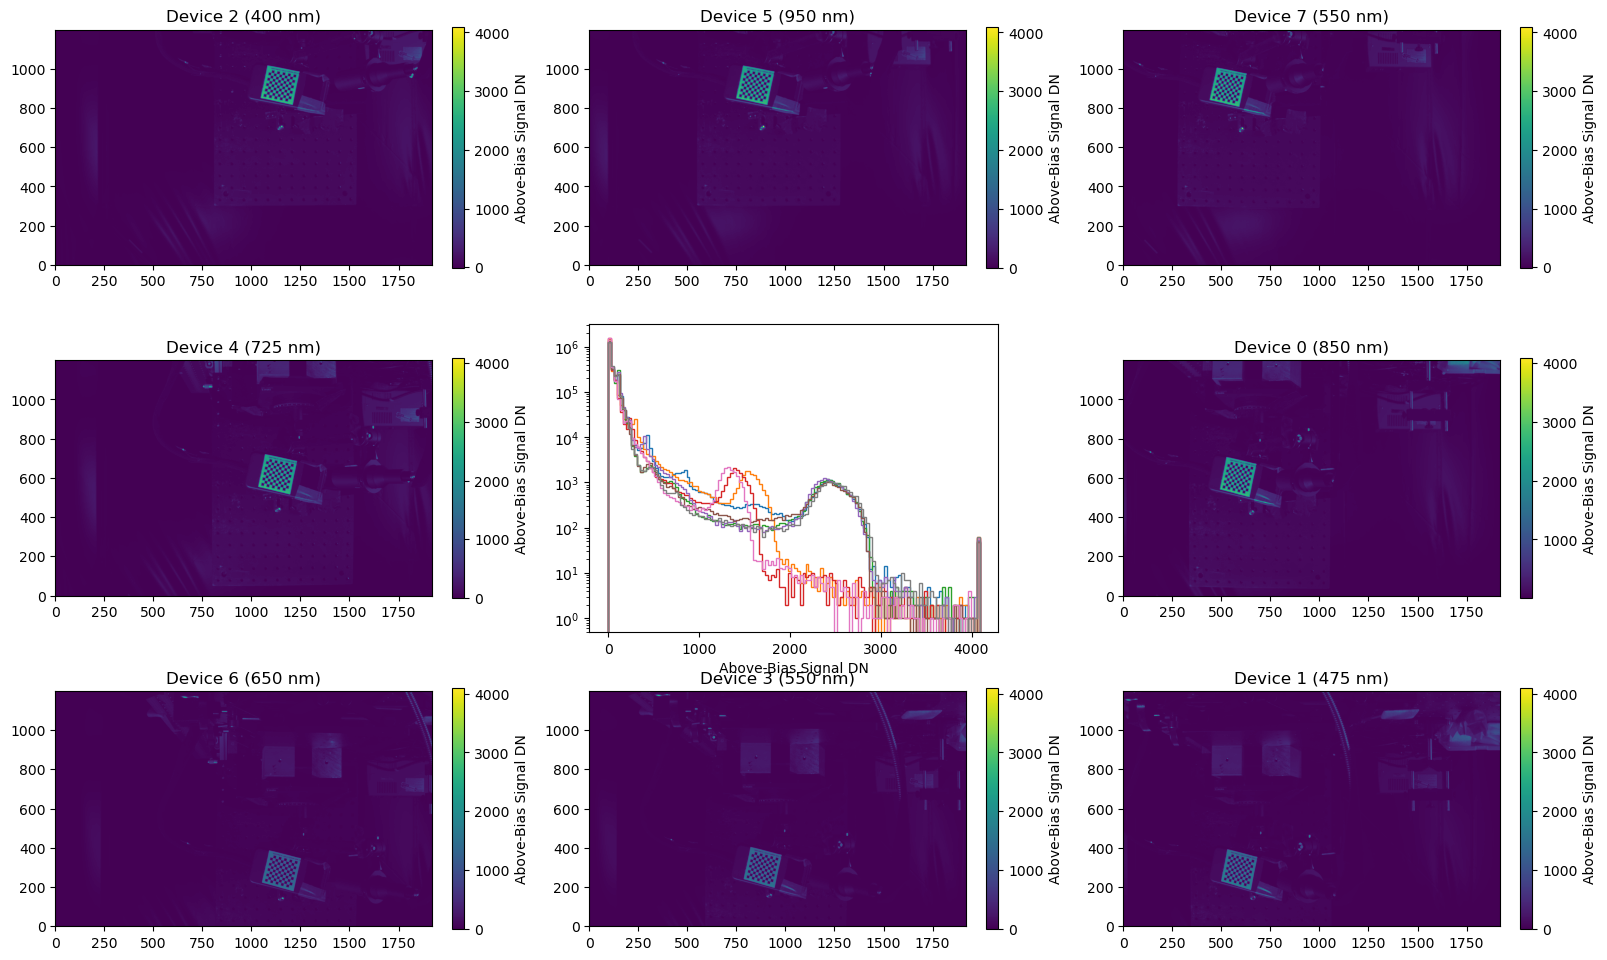

In [24]:
n_pos = 10
positions = {}
for pos in range(n_pos):
    print(f'Position {pos} of {n_pos}')
    pos_dir = f'geom_calibration_pos_{pos}_20072023'
    dark_dir = f'geom_calibration_dark_20072023'
    geocs = osp.load_geometric_calibration(subject=pos_dir, dark=dark_dir)
    positions[pos] = geocs

# Getting matching points

Position 0 of 10
Finding Checkerboard Corners for: 0 (850.0 nm)
Finding Checkerboard Corners for: 1 (475.0 nm)
Finding Checkerboard Corners for: 2 (400.0 nm)
Finding Checkerboard Corners for: 3 (550.0 nm)
Finding Checkerboard Corners for: 4 (725.0 nm)
Finding Checkerboard Corners for: 5 (950.0 nm)
Finding Checkerboard Corners for: 6 (650.0 nm)
Finding Checkerboard Corners for: 7 (550.0 nm)
Position 1 of 10
Finding Checkerboard Corners for: 0 (850.0 nm)
Finding Checkerboard Corners for: 1 (475.0 nm)
Finding Checkerboard Corners for: 2 (400.0 nm)
Finding Checkerboard Corners for: 3 (550.0 nm)
Finding Checkerboard Corners for: 4 (725.0 nm)
Finding Checkerboard Corners for: 5 (950.0 nm)
Finding Checkerboard Corners for: 6 (650.0 nm)
Finding Checkerboard Corners for: 7 (550.0 nm)
Position 2 of 10
Finding Checkerboard Corners for: 0 (850.0 nm)
Finding Checkerboard Corners for: 1 (475.0 nm)
Finding Checkerboard Corners for: 2 (400.0 nm)
Finding Checkerboard Corners for: 3 (550.0 nm)
Finding C

error: OpenCV(4.6.0) /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/imgproc/src/cornersubpix.cpp:58: error: (-215:Assertion failed) count >= 0 in function 'cornerSubPix'


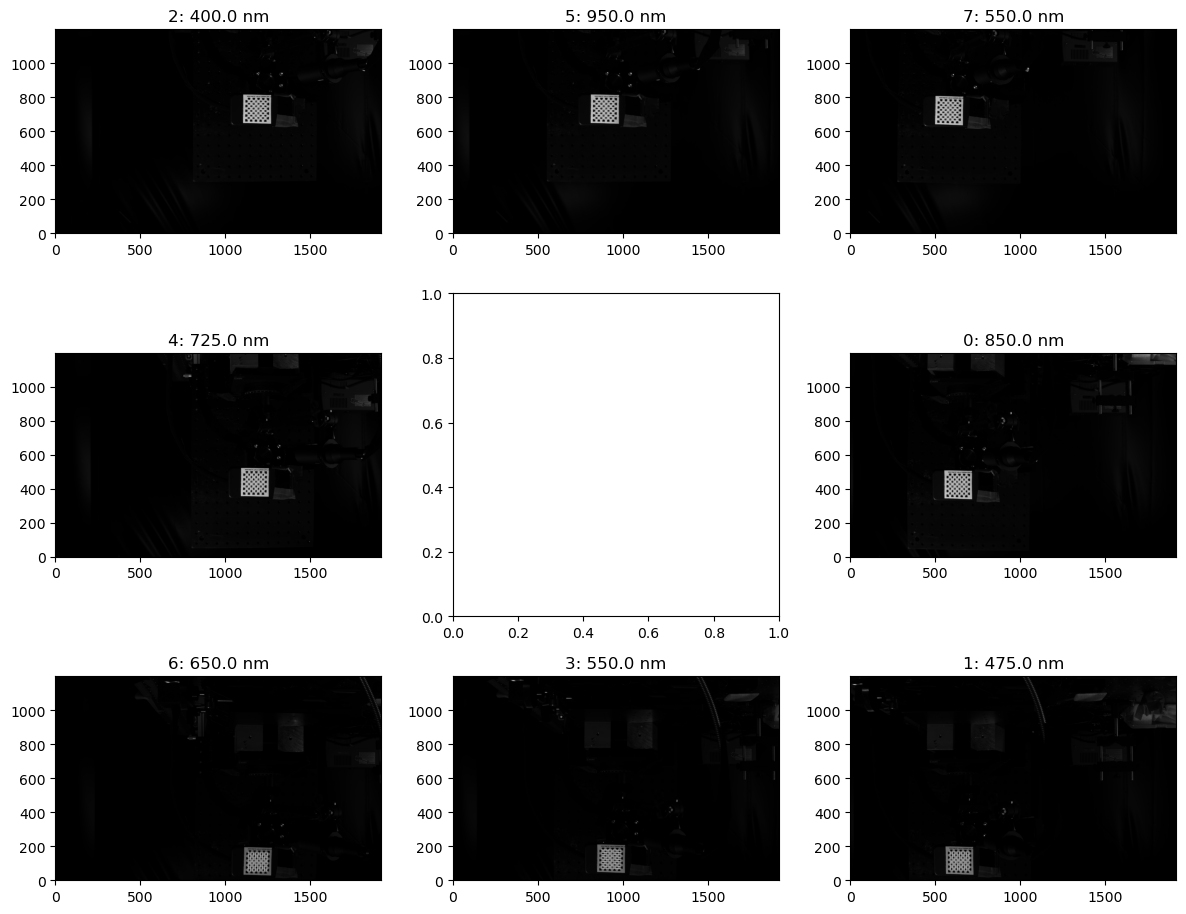

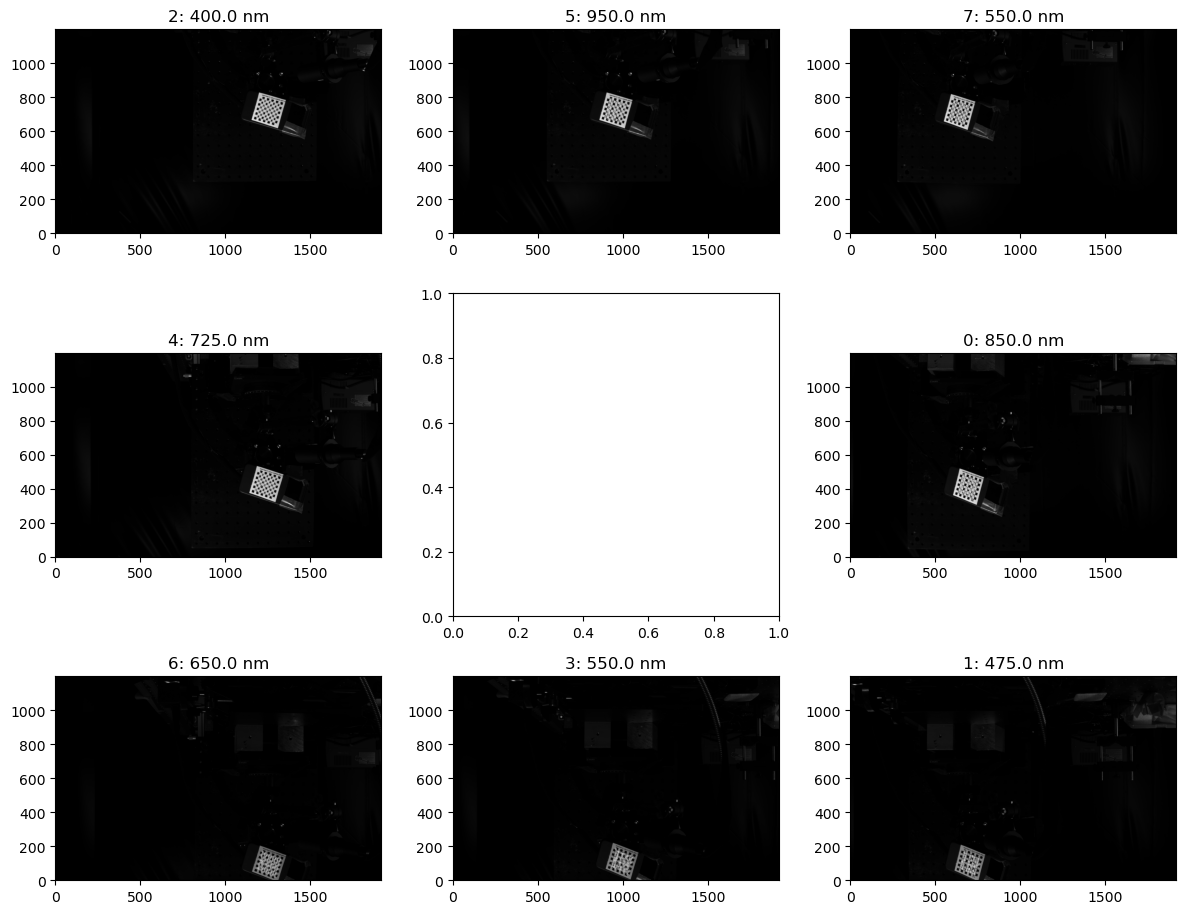

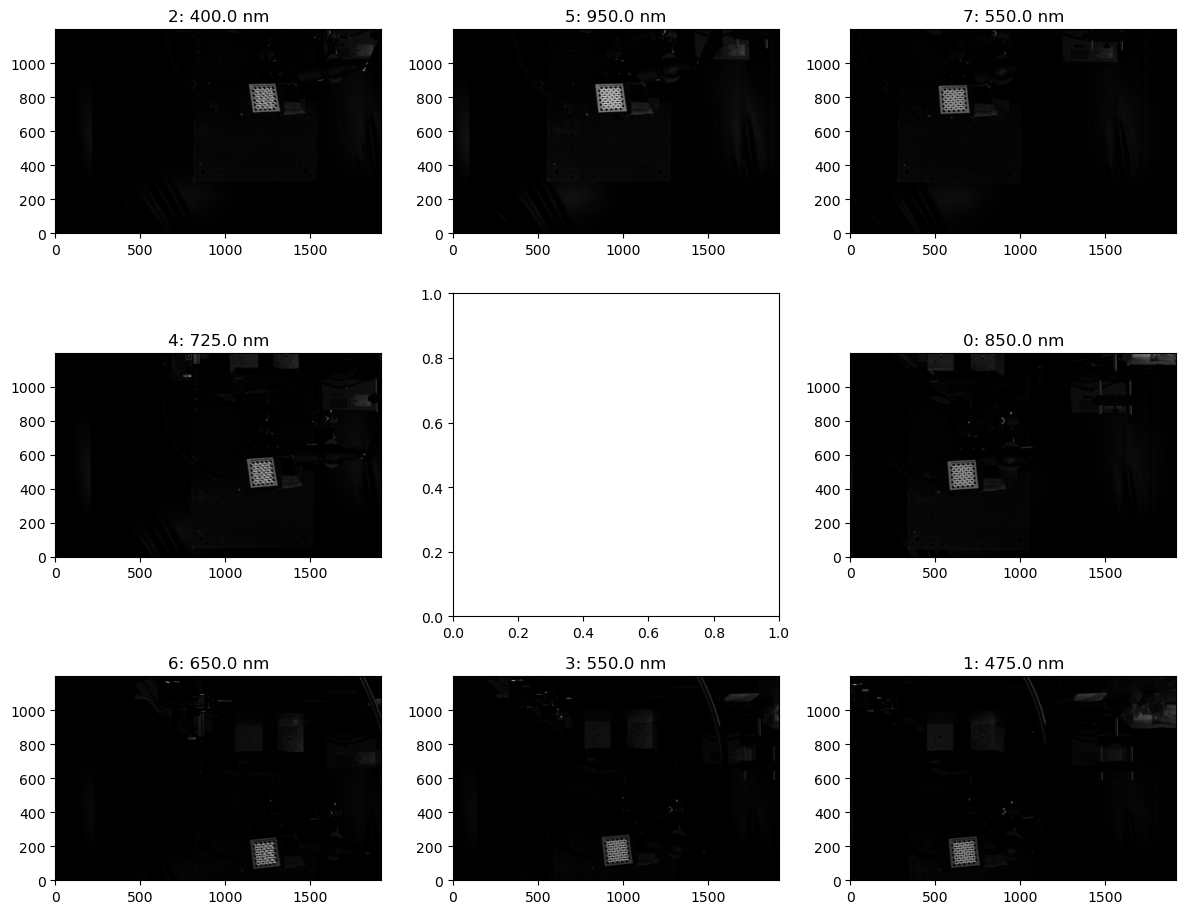

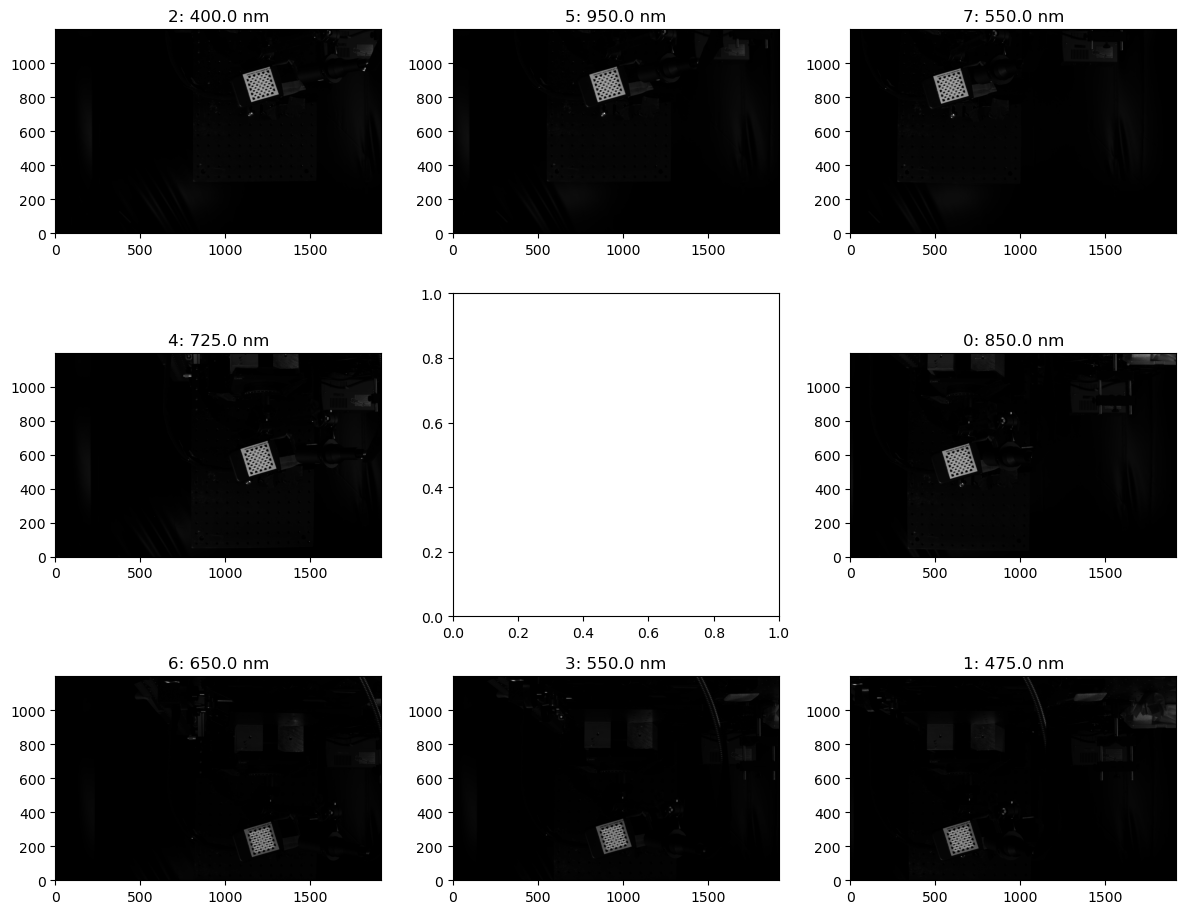

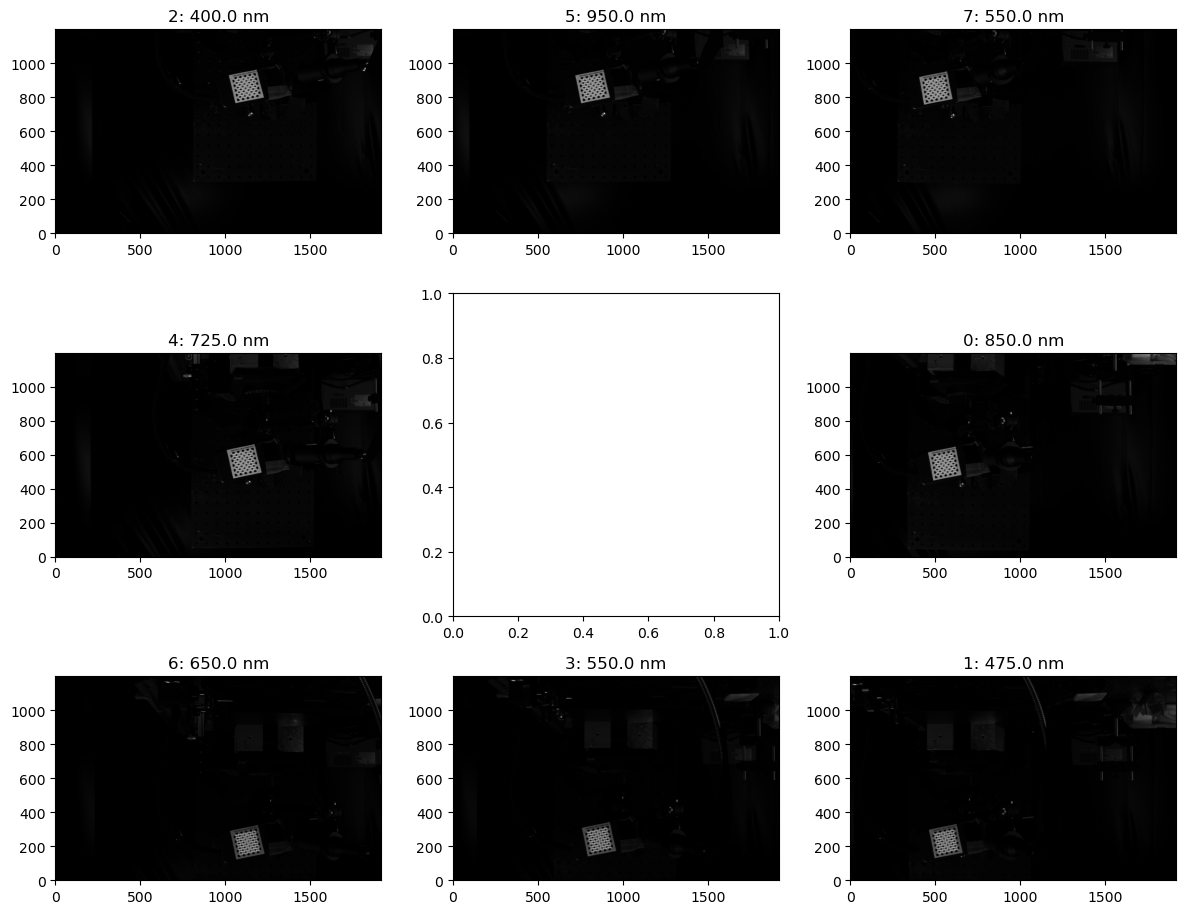

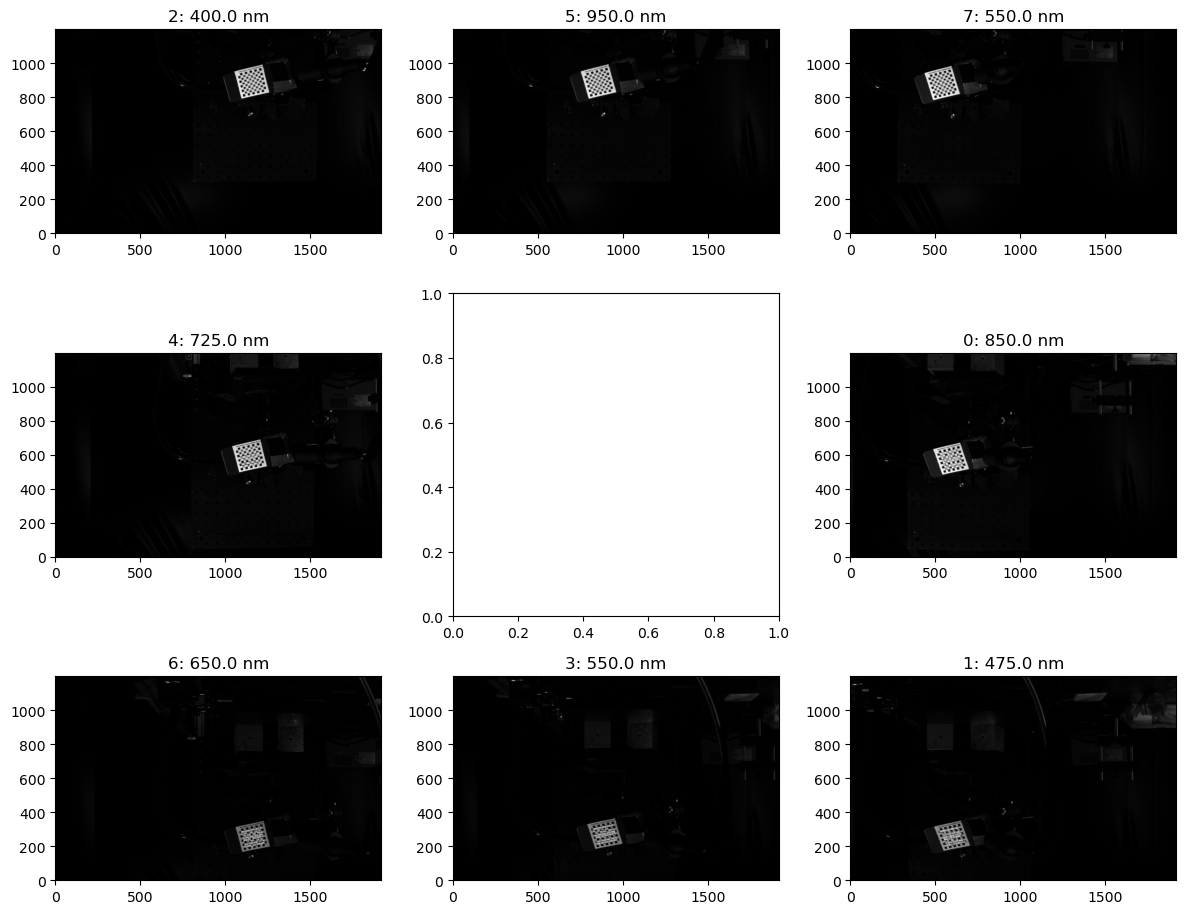

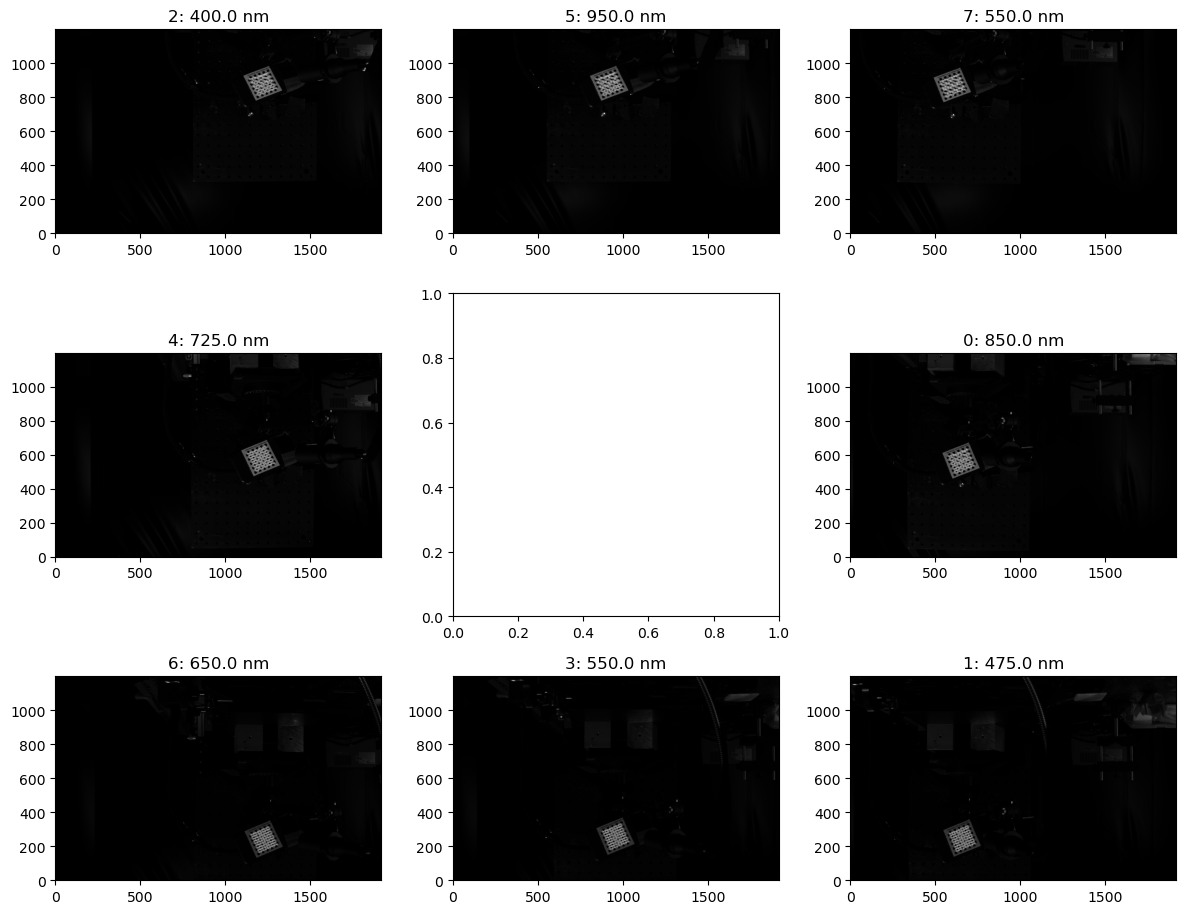

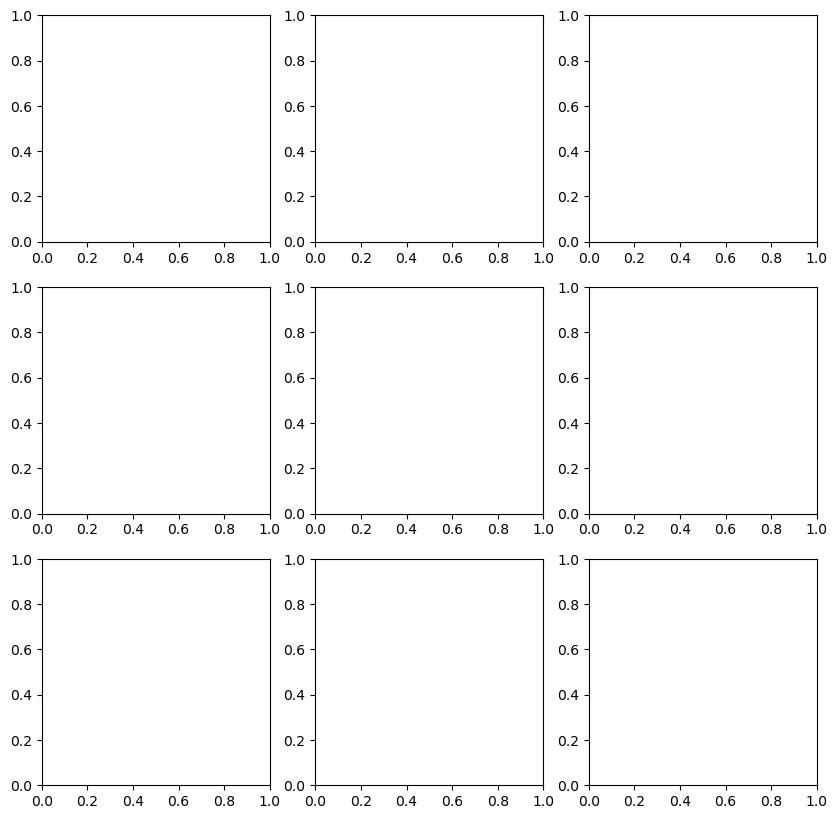

In [25]:
corners = {}
for pos in range(n_pos):
    print(f'Position {pos} of {n_pos}')
    geocs = positions[pos]
    corner_set = osp.checkerboard_calibration(geocs)
    corners[pos] = corner_set
    